# Dataset

Dataset is a CSV file obtained from Kaggel https://www.kaggle.com/austinreese/craigslist-carstrucks-data on second hand vehicle prices scrapped from Craigslist - USA.  It contains most of the relevant information on car sales including columns like price, condition, manufacturer, odometer, transmition, location etc. 


# Business Question


Which variables affect price and how?
Which are the high value markets?


# Objective

Pricing and location may be used to structure a business model to maximise sales margins


In [127]:
# import required pakages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stat
import matplotlib.pylab as pylab

### Wrangle


In [128]:
# read csv file to DataFrame and assign to df

df = pd.read_csv('vehicles.csv')

In [129]:
# view DataFrame
df

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,458208,7240959076,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,14995,2014.0,cadillac,srx,excellent,...,4wd,mid-size,SUV,silver,https://images.craigslist.org/00808_1bVcaYZtCy...,2014 Cadillac SRX All Wheel Drive Luxury Colle...,wi,44.408867,-89.881210,2020-12-03T08:56:29-0600
458209,458209,7240954682,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,17895,2018.0,hyundai,tucson,excellent,...,4wd,mid-size,SUV,white,https://images.craigslist.org/00l0l_gikkP11dEF...,2018 Hyundai Tucson SE 2.0 I4 AWD. Carfax ver...,wi,44.408867,-89.882240,2020-12-03T08:48:08-0600
458210,458210,7240645700,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,17900,2014.0,cadillac,cts coupe awd,excellent,...,4wd,mid-size,coupe,black,https://images.craigslist.org/00t0t_lNnW4cboOG...,"53,000 miles. Cosmetically, in near mint condi...",wy,44.784900,-106.964800,2020-12-02T14:09:45-0700
458211,458211,7240600465,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,1300,2008.0,jeep,grand cherokee,good,...,4wd,mid-size,SUV,white,https://images.craigslist.org/00C0C_fl0NW1IeJw...,PRICE REDUCTION Turns out the engine is toast...,wy,44.773500,-106.939600,2020-12-02T13:01:04-0700


In [130]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
id,7240372487,7240309422,7240224296,7240103965,7239983776
url,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org/cto/d/auburn-201...,https://auburn.craigslist.org/cto/d/auburn-200...,https://auburn.craigslist.org/cto/d/lanett-tru...,https://auburn.craigslist.org/cto/d/auburn-200...
region,auburn,auburn,auburn,auburn,auburn
region_url,https://auburn.craigslist.org,https://auburn.craigslist.org,https://auburn.craigslist.org,https://auburn.craigslist.org,https://auburn.craigslist.org
price,35990,7500,4900,2000,19500
year,2010,2014,2006,1974,2005
manufacturer,chevrolet,hyundai,bmw,chevrolet,ford
model,corvette grand sport,sonata,x3 3.0i,c-10,f350 lariat
condition,good,excellent,good,good,excellent


In [131]:
df.tail().T

,458208,458209,458210,458211,458212
Unnamed: 0,458208,458209,458210,458211,458212
id,7240959076,7240954682,7240645700,7240600465,7240562359
url,https://wausau.craigslist.org/ctd/d/wisconsin-...,https://wausau.craigslist.org/ctd/d/wisconsin-...,https://wyoming.craigslist.org/cto/d/sheridan-...,https://wyoming.craigslist.org/cto/d/sheridan-...,https://wyoming.craigslist.org/ctd/d/gilberts-...
region,wausau,wausau,wyoming,wyoming,wyoming
region_url,https://wausau.craigslist.org,https://wausau.craigslist.org,https://wyoming.craigslist.org,https://wyoming.craigslist.org,https://wyoming.craigslist.org
price,14995,17895,17900,1300,22900
year,2014,2018,2014,2008,2008
manufacturer,cadillac,hyundai,cadillac,jeep,NaN
model,srx,tucson,cts coupe awd,grand cherokee,International 4300
condition,excellent,excellent,excellent,good,NaN


In [132]:
# list columns
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [133]:
# drop undesired columns

df.drop(['Unnamed: 0', 'id', 'url','region', 'region_url', 'image_url', 'VIN','posting_date', 'description', 'paint_color', 'title_status', 'lat', 'long' ], axis = 1, inplace = True)

In [134]:
# view df after dropping columns
df


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,state
0,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,other,rwd,NaN,other,al
1,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,automatic,fwd,NaN,sedan,al
2,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,automatic,NaN,NaN,SUV,al
3,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,automatic,rwd,full-size,pickup,al
4,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,automatic,4wd,full-size,pickup,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,14995,2014.0,cadillac,srx,excellent,6 cylinders,gas,83790.0,automatic,4wd,mid-size,SUV,wi
458209,17895,2018.0,hyundai,tucson,excellent,4 cylinders,gas,31888.0,automatic,4wd,mid-size,SUV,wi
458210,17900,2014.0,cadillac,cts coupe awd,excellent,6 cylinders,gas,53000.0,automatic,4wd,mid-size,coupe,wy
458211,1300,2008.0,jeep,grand cherokee,good,8 cylinders,gas,164000.0,automatic,4wd,mid-size,SUV,wy


In [135]:
# check dtypes
df.dtypes

price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
transmission     object
drive            object
size             object
type             object
state            object
dtype: object

In [136]:
# Non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         458213 non-null  int64  
 1   year          457163 non-null  float64
 2   manufacturer  439993 non-null  object 
 3   model         453367 non-null  object 
 4   condition     265273 non-null  object 
 5   cylinders     287073 non-null  object 
 6   fuel          454976 non-null  object 
 7   odometer      402910 non-null  float64
 8   transmission  455771 non-null  object 
 9   drive         324025 non-null  object 
 10  size          136865 non-null  object 
 11  type          345475 non-null  object 
 12  state         458213 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 45.4+ MB


In [137]:
# null value sum of each variable

df.isnull().sum()

price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
transmission      2442
drive           134188
size            321348
type            112738
state                0
dtype: int64

In [138]:
# sum of null for df

df.isnull().sum().sum()

1017452

<AxesSubplot:>

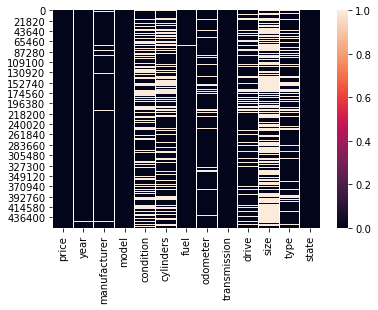

In [139]:
# heat map of null values

sns.heatmap(df.isnull())

In [140]:
# Size column has too many missing values i.e 321348. 
# dropping column

df.drop('size', axis = 1, inplace = True)

In [141]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
0,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,other,rwd,other,al
1,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,automatic,fwd,sedan,al
2,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,automatic,NaN,SUV,al
3,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,automatic,rwd,pickup,al
4,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,automatic,4wd,pickup,al
...,...,...,...,...,...,...,...,...,...,...,...,...
458208,14995,2014.0,cadillac,srx,excellent,6 cylinders,gas,83790.0,automatic,4wd,SUV,wi
458209,17895,2018.0,hyundai,tucson,excellent,4 cylinders,gas,31888.0,automatic,4wd,SUV,wi
458210,17900,2014.0,cadillac,cts coupe awd,excellent,6 cylinders,gas,53000.0,automatic,4wd,coupe,wy
458211,1300,2008.0,jeep,grand cherokee,good,8 cylinders,gas,164000.0,automatic,4wd,SUV,wy


# Clean Year column

In [142]:
# View all rows with nan year values
df.loc[df.year.isna(), :]


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
15,38500,NaN,NaN,500,NaN,8 cylinders,gas,28246.0,automatic,rwd,pickup,al
383,14500,NaN,NaN,n Sentra,NaN,4 cylinders,gas,22546.0,automatic,fwd,sedan,al
469,41800,NaN,NaN,olet Silverado 2500HD,NaN,8 cylinders,diesel,80910.0,automatic,4wd,pickup,al
484,18700,NaN,NaN,Compass,NaN,4 cylinders,gas,18316.0,automatic,fwd,SUV,al
849,28900,NaN,NaN,a Highlander,NaN,6 cylinders,gas,63061.0,automatic,fwd,SUV,al
...,...,...,...,...,...,...,...,...,...,...,...,...
457714,32888,NaN,NaN,F-150,NaN,6 cylinders,gas,52965.0,automatic,4wd,pickup,wa
457761,39840,NaN,NaN,Grand Cherokee,NaN,8 cylinders,gas,28547.0,automatic,4wd,SUV,wa
457866,40880,NaN,NaN,olet Silverado 1500,NaN,8 cylinders,gas,8077.0,automatic,4wd,pickup,wa
457867,27880,NaN,NaN,des-Benz GLA,NaN,4 cylinders,gas,15015.0,automatic,fwd,SUV,wa


In [143]:
# find mean year
df.year.mean()

2010.7460665014448

In [144]:
# Imputing -  replace all missing year  values with mean
mask_year = df.year.isna()
df.loc[mask_year, 'year'] = 2010

In [145]:
# verify that year nolonger has no nan values
df.isna().sum()

price                0
year                 0
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
transmission      2442
drive           134188
type            112738
state                0
dtype: int64

In [146]:
# change year dtype from float to integer

df['year'] = df.year.astype('int64')

In [147]:
# check that year dtypes

df.dtypes

price             int64
year              int64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
transmission     object
drive            object
type             object
state            object
dtype: object

# Cleaning Odometer Column

In [148]:
# view odometer range

df.odometer.agg([min, max])

min    0.000000e+00
max    2.043756e+09
Name: odometer, dtype: float64

In [149]:
# range is too high. some values not practical
# find odo values > 1 million

odo_mask = df.odometer > 1000000
df.loc[odo_mask,'odometer']

3539      1840000.0
4743      1150000.0
5693      1340000.0
5974      2075000.0
6945      2075000.0
            ...    
451136    2331500.0
451315    1800000.0
452887    1340000.0
455197    1800000.0
458143    5666665.0
Name: odometer, Length: 388, dtype: float64

In [150]:
# drop rows with values > 1 mill

df.drop(df.loc[odo_mask,'odometer'].index, inplace = True)

In [151]:
# Check that rows with odo > 1 mil dropped
df.loc[odo_mask,'odometer']

Series([], Name: odometer, dtype: float64)

In [152]:


df.loc[df.odometer.isna(), :]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
20,4500,2003,ford,f-150,NaN,NaN,gas,NaN,automatic,NaN,NaN,al
44,2200,1986,chevrolet,caprice,NaN,NaN,gas,NaN,automatic,NaN,NaN,al
64,34972,2019,infiniti,q60 3.0t premium coupe,like new,NaN,gas,NaN,automatic,NaN,NaN,al
69,1000,2008,chevrolet,hhr lt,fair,NaN,gas,NaN,automatic,NaN,SUV,al
218,4500,2006,honda,pilot,NaN,NaN,gas,NaN,automatic,NaN,NaN,al
...,...,...,...,...,...,...,...,...,...,...,...,...
457692,0,2017,acura,mdx w/technology pkg,NaN,6 cylinders,gas,NaN,automatic,4wd,SUV,wa
457707,0,2017,acura,mdx,NaN,6 cylinders,gas,NaN,automatic,4wd,SUV,wa
457723,0,2015,chevrolet,malibu lt,NaN,4 cylinders,gas,NaN,automatic,fwd,sedan,wa
457724,0,2015,honda,accord sedan sport,NaN,4 cylinders,gas,NaN,automatic,fwd,sedan,wa


In [153]:
df.isna().sum()

price                0
year                 0
manufacturer     18164
model             4835
condition       192846
cylinders       171018
fuel              3237
odometer         55303
transmission      2442
drive           134039
type            112605
state                0
dtype: int64

In [154]:
# Check Mean , median, mode

print('The odometer Mean is :' + str(df.odometer.mean()) )
print('The odometer median is :' + str(df.odometer.median()))
print('the odometer mode is :' + str(df.odometer.mode()))


The odometer Mean is :93603.1338709437
The odometer median is :87520.0
the odometer mode is :0    0.0
dtype: float64


In [155]:
# list cars which are not new but have 0 odometer
df.loc[(df.odometer == 0) & (df.condition != 'new')]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
42,0,2014,ram,NaN,NaN,NaN,diesel,0.0,automatic,NaN,other,al
276,2500,2006,chevrolet,malibu,NaN,6 cylinders,gas,0.0,automatic,fwd,sedan,al
325,0,2019,NaN,Biz On Wheels,excellent,NaN,gas,0.0,automatic,NaN,NaN,al
326,0,2019,NaN,Biz On Wheels,excellent,NaN,gas,0.0,automatic,NaN,NaN,al
365,3200,2005,ford,taurus,NaN,6 cylinders,NaN,0.0,automatic,fwd,sedan,al
...,...,...,...,...,...,...,...,...,...,...,...,...
456517,22500,2016,chevrolet,silverado 1500 lt automatic,NaN,NaN,gas,0.0,automatic,rwd,pickup,tx
456796,35990,2010,mercedes-benz,s-class,NaN,NaN,gas,0.0,automatic,rwd,NaN,tx
457732,9988,2008,toyota,highlander hybrid,excellent,6 cylinders,hybrid,0.0,automatic,4wd,other,wa
457735,9988,2008,toyota,highlander hybrid,excellent,6 cylinders,hybrid,0.0,automatic,4wd,other,wa


In [156]:
#  inputing odometer nan values by replacing with media

odo_mask2 = (df.odometer == 0) & (df.condition != 'new')
df.loc[odo_mask2, 'odometer'] = 87520





In [157]:
# inputing odometer nan values by replacing with median

odo_mask2 = df.odometer.isna()

df.loc[odo_mask2, 'odometer'] = 87520



In [158]:
# check odometer null values

df.odometer.isnull().sum()

0

# Cleaning Price Column

In [159]:
# check min, max of price
df.price.agg([min, max])

min             0
max    3615215112
Name: price, dtype: int64

In [160]:
# view cars above 250000 and assess how to clean
pd.options.display.max_rows = 80
high_price = df[df.price > 250000]
high_price


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
1622,1234567890,1955,chevrolet,NaN,NaN,NaN,gas,87520.0,automatic,NaN,NaN,al
21955,1234567,1955,chevrolet,NaN,NaN,NaN,other,87520.0,other,NaN,NaN,ar
25413,11111111,2007,nissan,pathfinder,NaN,NaN,gas,150000.0,automatic,4wd,NaN,ca
38375,2808348671,2020,gmc,NaN,NaN,8 cylinders,gas,87520.0,automatic,NaN,NaN,ca
39335,599000,2020,toyota,NaN,NaN,NaN,other,87520.0,other,NaN,NaN,ca
41703,279888,2017,ferrari,488 spider,like new,8 cylinders,gas,5900.0,automatic,NaN,NaN,ca
42435,269888,2020,NaN,lamborghini urus,like new,8 cylinders,gas,7500.0,automatic,4wd,NaN,ca
51130,339998,2018,NaN,LAMBORGHINI AVENTADOR,NaN,NaN,gas,5915.0,automatic,NaN,coupe,ca
53582,285888,2017,ferrari,488 spider,NaN,8 cylinders,gas,2862.0,automatic,rwd,convertible,ca
55387,888777,2005,toyota,land cruiser,NaN,NaN,gas,99999.0,manual,NaN,NaN,ca


In [161]:
# return display options max_rows to default
pd.options.display.max_rows = 15


In [162]:
# deleting rows with car prices > 250000

df.drop(df.loc[df.price > 250000, 'price'].index, inplace = True)

# check max price to confirm
df.price.max()

249995

In [163]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
0,35990,2010,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,other,rwd,other,al
1,7500,2014,hyundai,sonata,excellent,4 cylinders,gas,93600.0,automatic,fwd,sedan,al
2,4900,2006,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,automatic,NaN,SUV,al
3,2000,1974,chevrolet,c-10,good,4 cylinders,gas,190000.0,automatic,rwd,pickup,al
4,19500,2005,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,automatic,4wd,pickup,al
...,...,...,...,...,...,...,...,...,...,...,...,...
458208,14995,2014,cadillac,srx,excellent,6 cylinders,gas,83790.0,automatic,4wd,SUV,wi
458209,17895,2018,hyundai,tucson,excellent,4 cylinders,gas,31888.0,automatic,4wd,SUV,wi
458210,17900,2014,cadillac,cts coupe awd,excellent,6 cylinders,gas,53000.0,automatic,4wd,coupe,wy
458211,1300,2008,jeep,grand cherokee,good,8 cylinders,gas,164000.0,automatic,4wd,SUV,wy


# Cleaning Cylinder column and converting dtype to 'int64'

In [164]:
# see unique cyilinder values
df.cylinders.unique()

array(['8 cylinders', '4 cylinders', '6 cylinders', nan, '10 cylinders',
       'other', '5 cylinders', '3 cylinders', '12 cylinders'],
      dtype=object)

In [165]:
# replace cylinders list with number

df.cylinders.replace('8 cylinders', 8, inplace = True)
df.cylinders.replace('4 cylinders', 4, inplace = True)
df.cylinders.replace('6 cylinders', 6, inplace = True)
df.cylinders.replace('10 cylinders', 10, inplace = True)
df.cylinders.replace('5 cylinders', 5, inplace = True)
df.cylinders.replace('3 cylinders', 3, inplace = True)
df.cylinders.replace('12 cylinders', 12, inplace = True)

# check cylinders values
df.cylinders.unique()

array([8, 4, 6, nan, 10, 'other', 5, 3, 12], dtype=object)

In [166]:
df.cylinders.dtype


dtype('O')

In [167]:
df[df.cylinders == 'other']

#observation cylinders - other includes electric vehicles
#observation rows with model - SPECIAL FINANCE PROGRAM 2020 offer no value (noise). Recent year but low value.

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
275,500,2020,NaN,SPECIAL FINANCE PROGRAM 2020,excellent,other,other,87520.0,other,NaN,bus,al
388,1000,2020,NaN,SPECIAL FINANCE PROGRAM 2020,excellent,other,other,87520.0,other,NaN,bus,al
617,1000,2020,NaN,SPECIAL FINANCE PROGRAM 2020,excellent,other,other,87520.0,other,NaN,bus,al
703,1000,2020,NaN,SPECIAL FINANCE PROGRAM 2020,excellent,other,other,87520.0,other,NaN,bus,al
777,1000,2020,NaN,SPECIAL FINANCE PROGRAM 2020,excellent,other,other,87520.0,other,NaN,bus,al
...,...,...,...,...,...,...,...,...,...,...,...,...
454409,0,2020,NaN,ALL MAKES,excellent,other,gas,8.0,automatic,fwd,sedan,nh
455276,11999,2016,volkswagen,e-golf,NaN,other,electric,33000.0,automatic,fwd,hatchback,or
455831,19995,2011,ford,f350 4x4,good,other,gas,72069.0,automatic,4wd,truck,pa
455988,4600,2012,nissan,leaf,excellent,other,electric,58650.0,automatic,fwd,hatchback,sc


In [168]:
# checking how many model == 'SPECIAL FINANCE PROGRAM 2020'

df[df.model == 'SPECIAL FINANCE PROGRAM 2020'].count()

price           13
year            13
manufacturer     0
model           13
condition       13
cylinders       13
fuel            13
odometer        13
transmission    13
drive            0
type            13
state           13
dtype: int64

In [169]:
# drop rows with model - SPECIAL FINANCE PROGRAM 2020

model_mask = df.model == 'SPECIAL FINANCE PROGRAM 2020'

df.drop(df.loc[model_mask, 'model'].index, inplace = True)

# recheck count to confirm successful row drop

df[df.model == 'SPECIAL FINANCE PROGRAM 2020'].count()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
type            0
state           0
dtype: int64

In [170]:
# view electric vehicles
df[df.fuel == 'electric']

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
454,38990,2018,tesla,model 3 long range sedan,good,NaN,electric,17399.0,other,rwd,sedan,al
462,33990,2018,tesla,model 3 mid range sedan 4d,good,NaN,electric,47215.0,other,rwd,sedan,al
474,30990,2012,tesla,model s sedan 4d,good,NaN,electric,58708.0,other,rwd,sedan,al
708,38990,2013,tesla,model s,NaN,NaN,electric,69961.0,automatic,rwd,sedan,al
1057,38590,2019,tesla,model 3 standard range,good,NaN,electric,6084.0,other,rwd,sedan,al
...,...,...,...,...,...,...,...,...,...,...,...,...
457437,20990,2018,bmw,i3 base w/range extender,good,NaN,electric,23927.0,other,rwd,hatchback,va
457648,6499,2013,nissan,leaf,NaN,NaN,electric,41832.0,automatic,fwd,hatchback,wa
458200,13990,2014,bmw,i3 hatchback 4d,good,NaN,electric,28446.0,other,rwd,hatchback,wi
458201,14590,2015,bmw,i3 hatchback 4d,good,NaN,electric,16347.0,other,rwd,hatchback,wi


In [171]:
# asign electric vehicles - cylinders to 0

electric_mask = df.fuel == 'electric'

df.loc[electric_mask, 'cylinders'] = 0

#Check cylinders value counts 
df.cylinders.value_counts()

# observation 4, 6, 8 cylinders are most common

6        105537
4         94631
8         81072
0          2351
5          2057
10         1516
other       862
3           546
12          177
Name: cylinders, dtype: int64

In [172]:
df.type.value_counts()

# Observation sedans are the most common cars

sedan          92308
SUV            79823
pickup         43309
truck          35641
other          24144
coupe          19079
hatchback      16377
wagon          10468
van             9567
convertible     6851
mini-van        6254
bus              701
offroad          645
Name: type, dtype: int64

In [173]:
# since observation 4, 6, 8 cylinders are most common with figures in the same order. it would create bias to 
# impute the cylinders with value 'other'.
# droping rows with cylinders - other

cylinders_mask2 = df.cylinders == 'other'
df.drop(df.loc[cylinders_mask2].index, inplace = True)

# check cylinder value counts to confirm successful drop

df.cylinders.value_counts()

6     105537
4      94631
8      81072
0       2351
5       2057
10      1516
3        546
12       177
Name: cylinders, dtype: int64

In [174]:
df.cylinders.isnull().sum()

# cylinder null values is high. 
# For the purposes of academic illustration and progress I shall dorp all rows with null in order to get a correlation with ....

168985

In [175]:
# Droping rows with cylinders - NaN

cylinders_mask3 = df.cylinders.isnull()
df.drop(df.loc[cylinders_mask3].index, inplace = True)

# rechek cyliner nulls

df.cylinders.isnull().sum()

0

In [176]:
# change cylinder dtype from object to integer

df['cylinders'] = df.cylinders.astype('int64')

df.cylinders.unique()

array([ 8,  4,  6, 10,  0,  5,  3, 12], dtype=int64)

In [177]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
0,35990,2010,chevrolet,corvette grand sport,good,8,gas,32742.0,other,rwd,other,al
1,7500,2014,hyundai,sonata,excellent,4,gas,93600.0,automatic,fwd,sedan,al
2,4900,2006,bmw,x3 3.0i,good,6,gas,87046.0,automatic,NaN,SUV,al
3,2000,1974,chevrolet,c-10,good,4,gas,190000.0,automatic,rwd,pickup,al
4,19500,2005,ford,f350 lariat,excellent,8,diesel,116000.0,automatic,4wd,pickup,al
...,...,...,...,...,...,...,...,...,...,...,...,...
458206,5300,2013,chevrolet,captiva,excellent,4,gas,140000.0,automatic,fwd,SUV,wi
458208,14995,2014,cadillac,srx,excellent,6,gas,83790.0,automatic,4wd,SUV,wi
458209,17895,2018,hyundai,tucson,excellent,4,gas,31888.0,automatic,4wd,SUV,wi
458210,17900,2014,cadillac,cts coupe awd,excellent,6,gas,53000.0,automatic,4wd,coupe,wy


# Cleaning Condition column and assining dummy variables

In [178]:
df.condition.unique()

array(['good', 'excellent', nan, 'like new', 'salvage', 'fair', 'new'],
      dtype=object)

In [179]:
df.condition.value_counts()

excellent    91919
good         89162
like new     20937
fair          6482
new           1031
salvage        537
Name: condition, dtype: int64

In [180]:
df.condition.isnull().sum()

77819

In [181]:
null_cond = df.loc[df.condition.isnull()]
null_cond


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
15,38500,2010,NaN,500,NaN,8,gas,28246.0,automatic,rwd,pickup,al
25,0,2016,chevrolet,silverado 1500 lt z71,NaN,8,other,29458.0,automatic,4wd,truck,al
82,8500,2012,chevrolet,equinox lt,NaN,4,gas,139333.0,automatic,fwd,SUV,al
90,3400,2010,ford,focus,NaN,4,gas,151269.0,automatic,fwd,sedan,al
100,3900,2008,honda,odyssey,NaN,6,gas,180211.0,automatic,fwd,van,al
...,...,...,...,...,...,...,...,...,...,...,...,...
458146,1950,2006,ford,explorer,NaN,6,gas,192136.0,automatic,4wd,SUV,wi
458152,11500,2002,chevrolet,silverado 2500hd duramax,NaN,8,diesel,362000.0,automatic,4wd,truck,wi
458157,1300,2004,dodge,durango rt,NaN,8,gas,200000.0,automatic,NaN,NaN,wi
458175,6997,2006,toyota,rav4,NaN,6,gas,174866.0,automatic,fwd,SUV,wi


In [182]:
# imputing condition NaN to 'good' (mid value bias)

cond_mask = df.condition.isnull()
df.loc[cond_mask, 'condition'] = 'good'

# check condition value counts
df.condition.value_counts()

good         166981
excellent     91919
like new      20937
fair           6482
new            1031
salvage         537
Name: condition, dtype: int64

In [183]:
# Crating dummy Variable for Condition and assigning
# {'salvage': 0, 'fair': 1, 'good':2, 'excellent': 3, 'like new':4, 'new':5 }


df.condition.replace('salvage', 0, inplace = True)
df.condition.replace('fair', 1, inplace = True)
df.condition.replace('good', 2, inplace = True)
df.condition.replace('excellent', 3, inplace = True)
df.condition.replace('like new', 4, inplace = True)
df.condition.replace('new', 5, inplace = True)

# check condition dummy values
df.condition.unique()

array([2, 3, 4, 0, 1, 5], dtype=int64)

# Cleaning Drive column and assigning dummy variables

In [184]:
# check unique values of drive
df.drive.unique()

array(['rwd', 'fwd', nan, '4wd'], dtype=object)

In [185]:
# drive value_counts
df.drive.value_counts()

4wd    107449
fwd     90404
rwd     52416
Name: drive, dtype: int64

In [186]:
# drive null values
df.drive.isnull().sum()

37618

In [187]:
# Drop rows with null drive values

drive_mask = df.drive.isnull()
df.drop(df.loc[drive_mask, 'drive'].index, inplace = True)

# check to confirm row have dropped
df.drive.isnull().sum()

0

In [188]:
# Creating Dummy Variables for drive
# {'fwd': 1, 'rwd': 2, '4wd': 3}

df.drive.replace('fwd', 1, inplace = True)
df.drive.replace('rwd', 2, inplace = True)
df.drive.replace('4wd', 3, inplace = True)

# check values for drive
df.drive.unique()


array([2, 1, 3], dtype=int64)

# Clean Fuel Column

In [189]:
df.fuel.unique()

array(['gas', 'diesel', 'other', 'hybrid', nan, 'electric'], dtype=object)

In [190]:
df.fuel.value_counts()

gas         222258
diesel       16683
other         4842
hybrid        3553
electric      1839
Name: fuel, dtype: int64

In [191]:
df.fuel.isna().sum()

1094

In [192]:
# Drop fuel NaN values 
fuel_mask = df.fuel.isnull()
df.drop(df.loc[fuel_mask, 'fuel'].index, inplace = True)

# Check null values
df.fuel.isna().sum()

0

In [193]:
# Create and assign Dummy variables for fuel
# {'gas': 1, 'diesel: 2, 'other':3 , 'hybrid': 4, 'electric': 5}


df.fuel.replace('gas', 1, inplace = True)
df.fuel.replace('diesel', 2, inplace = True)
df.fuel.replace('other', 3, inplace = True)
df.fuel.replace('hybrid', 4, inplace = True)
df.fuel.replace('electric', 5, inplace = True)

# Check fue variables

df.fuel.unique()


array([1, 2, 3, 4, 5], dtype=int64)

<AxesSubplot:>

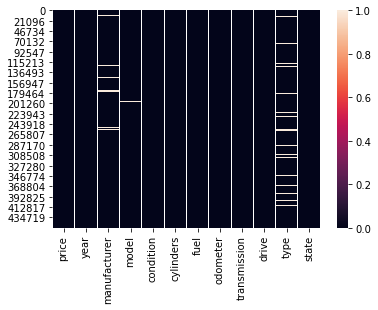

In [194]:
# review heat map of null values after cleaning

sns.heatmap(df.isnull())

<AxesSubplot:>

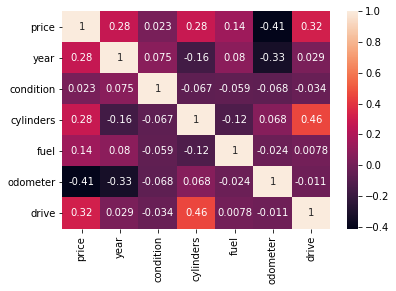

In [195]:
sns.heatmap(df.corr(), annot = True)

# Bussiness Answer  / Insight

## Question: which variables affect price and how?



### Price to Drive
 {'fwd': 1, 'rwd': 2, '4wd': 3}

0.32 Corr
+ve Corr
price generally increases from fwd ---> rwd ----> 4 wd


### Price to odometer
-0.41 Corr
moderate -ve Corr
the lower the odometer the higher the price


### Price to Fuel
{'gas': 1, 'diesel: 2, 'other':3 , 'hybrid': 4, 'electric': 5}
0.14 Corr
price generally increases from gas ---> diesel ---> other ---> hybrid ---> electric

### price to Cylinders
0.28 Corr
moderate +ve
price increases with increace in number of cylinders

### Price to Condition
 {'salvage': 0, 'fair': 1, 'good':2, 'excellent': 3, 'like new':4, 'new':5 }
0.0023 Corr
price and condition have little to no  correllation


### Price to Year
0.28 Corr
newer veichles (i.e.higher year) tend to be more expensive









# Some Statistical values & Visualisation

In [196]:
df.describe()

,price,year,condition,cylinders,fuel,odometer,drive
count,249175.000000,249175.000000,249175.000000,249175.000000,249175.000000,249175.000000,249175.000000
mean,14621.793912,2010.393832,2.458252,5.880124,1.178116,97537.325418,2.068927
std,13653.905960,8.750208,0.690749,1.696276,0.599479,63183.329206,0.886531
min,0.000000,1900.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,4950.000000,2007.000000,2.000000,4.000000,1.000000,49977.000000,1.000000
50%,10500.000000,2012.000000,2.000000,6.000000,1.000000,87520.000000,2.000000
75%,20995.000000,2016.000000,3.000000,8.000000,1.000000,134543.000000,3.000000
max,249988.000000,2021.000000,5.000000,12.000000,5.000000,1000000.000000,3.000000


In [198]:
df.mode()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
0,0,2017,ford,f-150,2,6,1,87520.0,automatic,3,sedan,ca


In [199]:
# manufacture counts
pd.options.display.max_rows = 50     
man = df.manufacturer.value_counts()
man

ford               43263
chevrolet          36978
toyota             21890
honda              14337
jeep               13326
nissan             12971
ram                 9989
gmc                 9529
dodge               9314
bmw                 6237
hyundai             5783
mercedes-benz       5575
subaru              5300
volkswagen          4963
kia                 4848
chrysler            4218
lexus               4058
cadillac            3615
buick               2914
mazda               2800
audi                2421
acura               2226
lincoln             1830
infiniti            1776
pontiac             1658
volvo               1370
mitsubishi          1308
mini                1071
rover                975
mercury              960
saturn               775
porsche              756
tesla                665
jaguar               627
fiat                 391
alfa-romeo            72
ferrari               36
datsun                28
harley-davidson       25
land rover            17


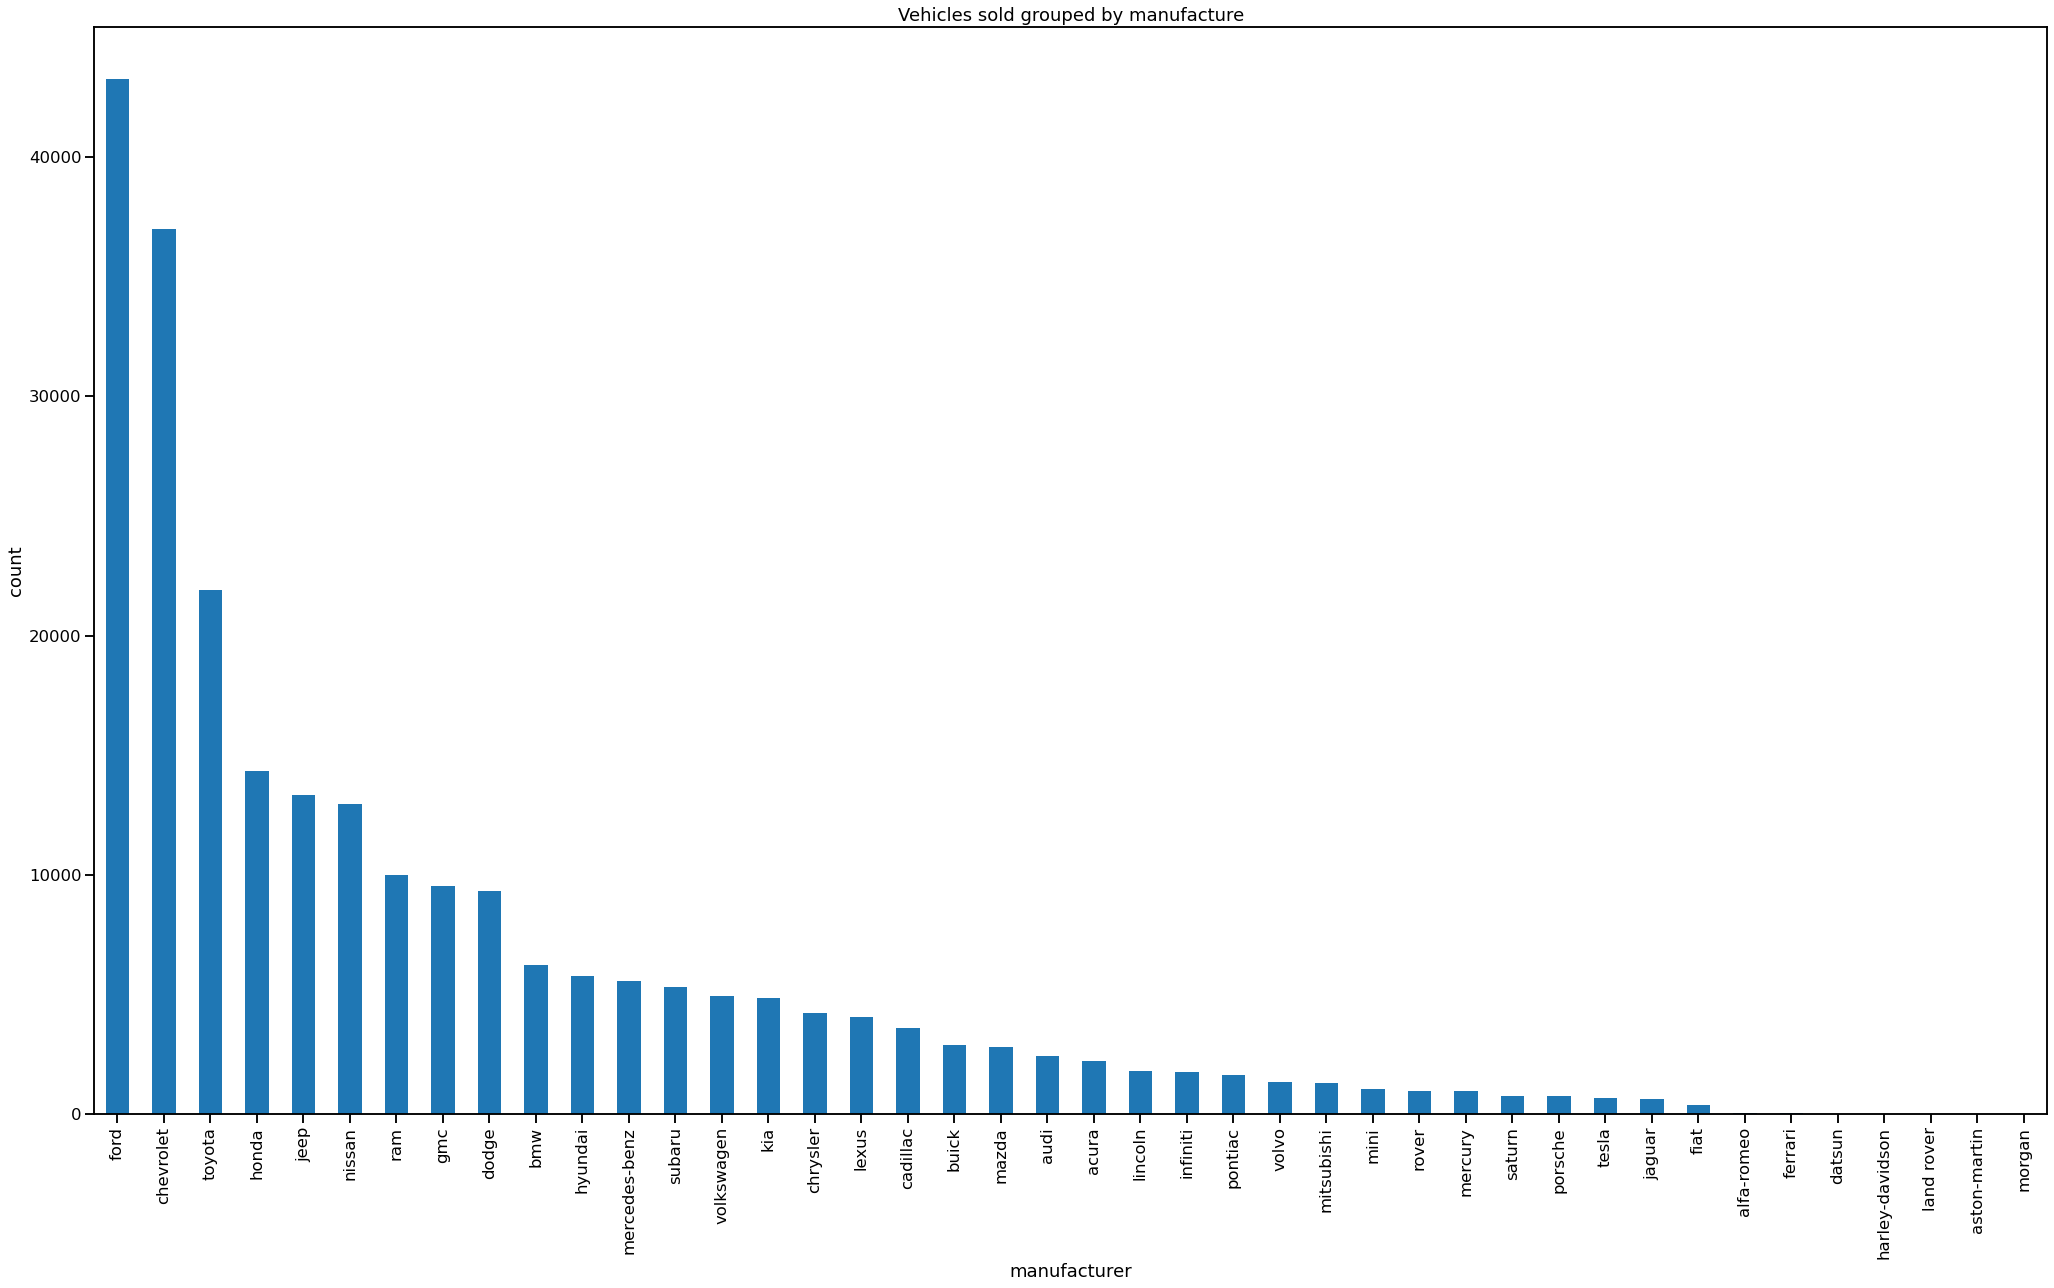

In [203]:
# plot manufature Vs number of vehicles
plt.figure(figsize = (35,20))
sns.set_context('talk')
man.plot.bar()
plt.xlabel('manufacturer')
plt.ylabel('count')
plt.title('Vehicles sold grouped by manufacture')
plt.show()

In [205]:
m = df.model.value_counts()
models = pd.DataFrame(m)
top_models = models.head(20)
top_models

,model
f-150,4421
silverado 1500,3684
1500,2465
camry,2108
accord,2027
escape,1930
civic,1780
altima,1732
wrangler,1614
tacoma,1566


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state


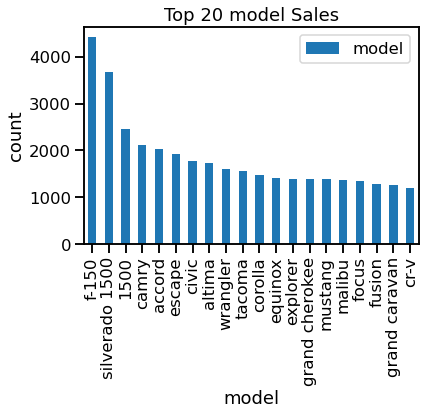

In [206]:
top_models.plot.bar()
plt.xlabel('model')
plt.ylabel('count')
plt.title('Top 20 model Sales')
plt.show()

Text(0.5, 1.0, 'Car Sales By Vehicle Type')

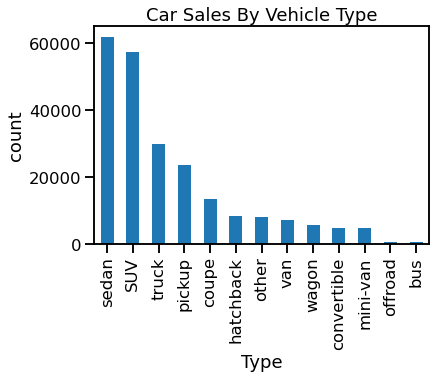

In [229]:
# Car sales by type
df.type.value_counts().plot.bar()
plt.xlabel('Type')
plt.ylabel('count')
plt.title('Car Sales By Vehicle Type')

In [230]:
states = df.state.value_counts()
states

ca    24563
fl    15707
tx    12182
or    12169
ny    11430
      ...  
ne      800
wy      661
wv      654
de      600
nd      445
Name: state, Length: 51, dtype: int64

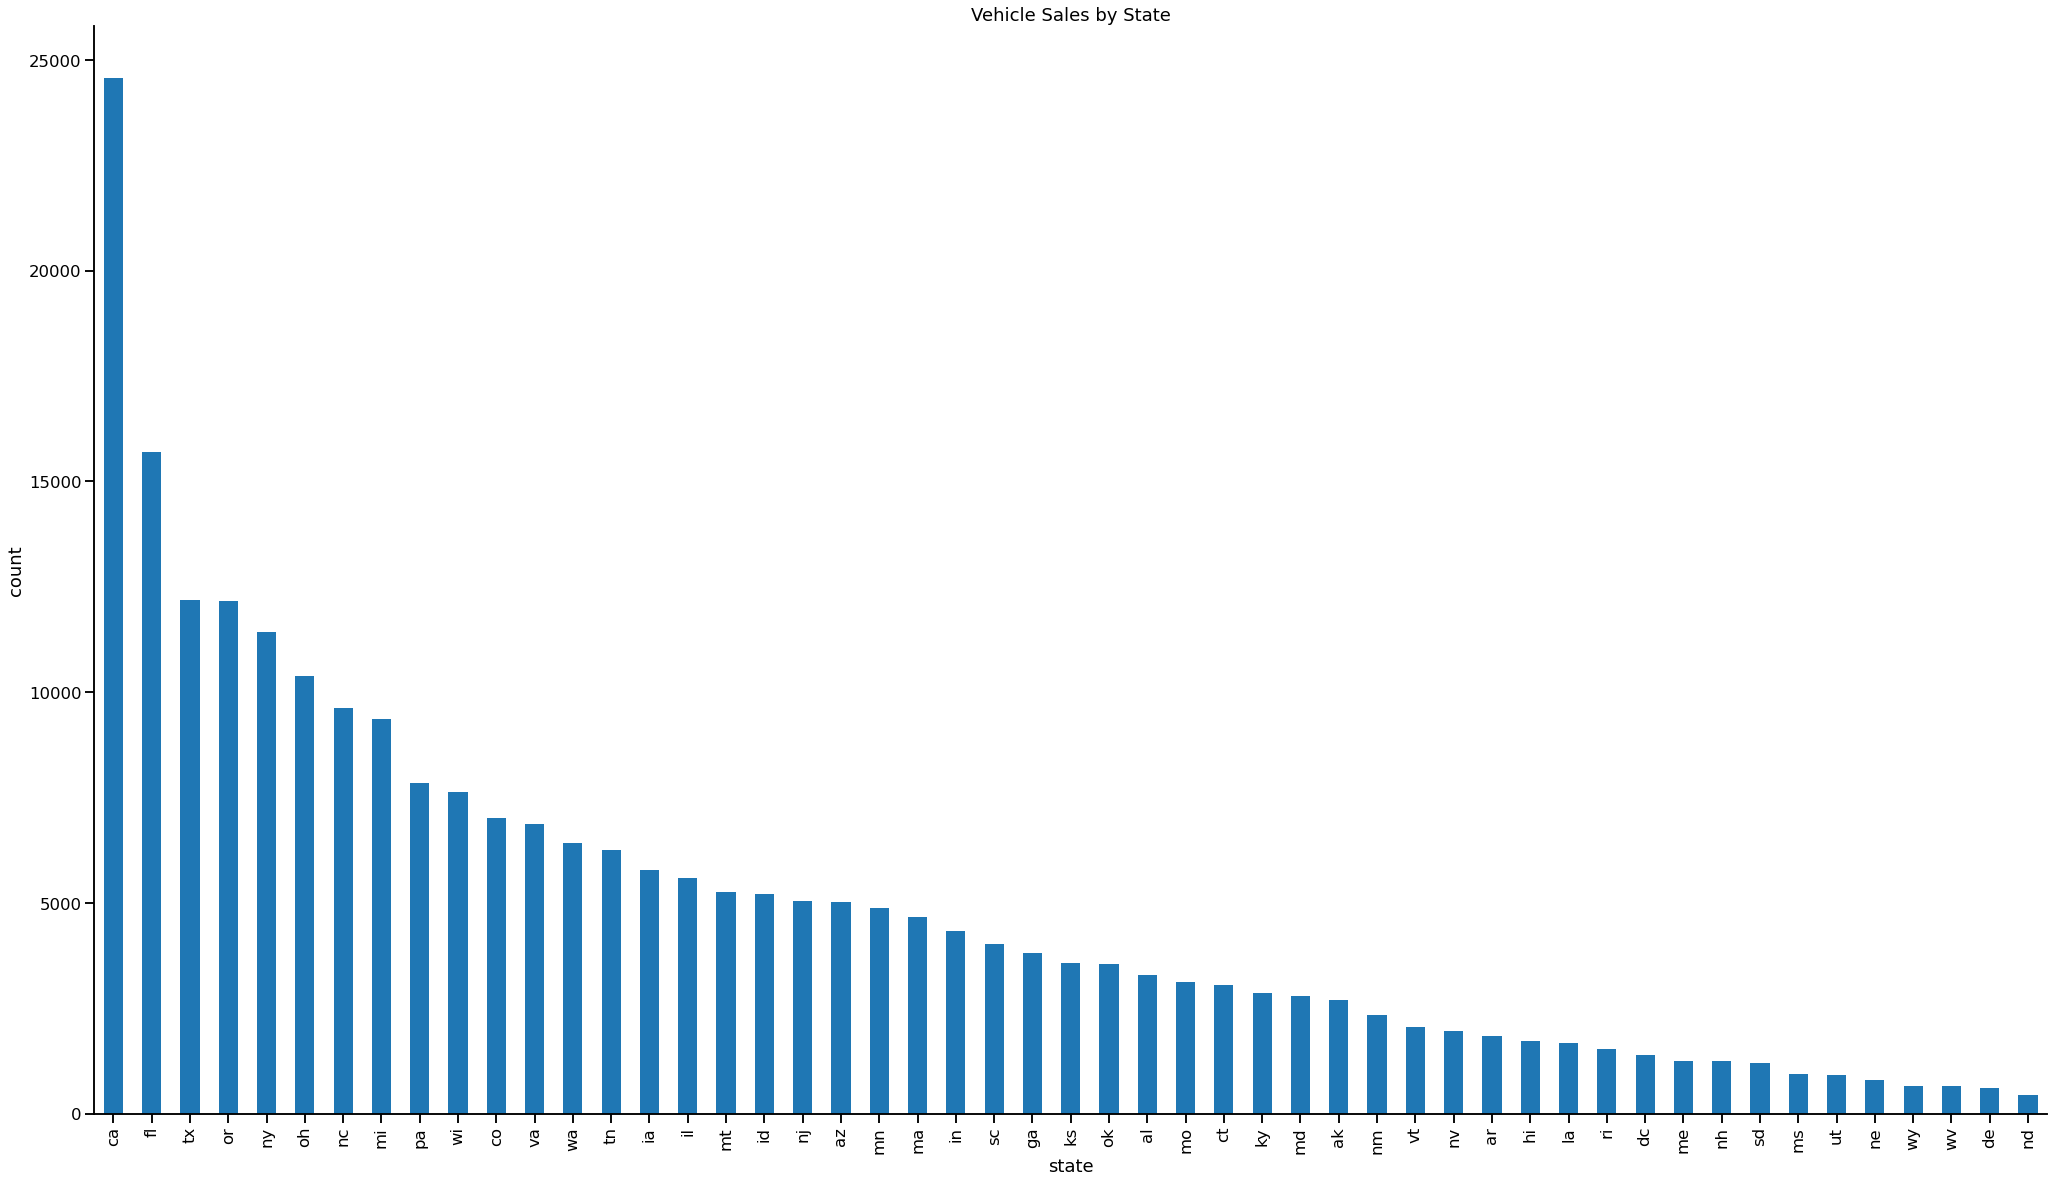

In [241]:
plt.figure(figsize = (35,20))
sns.set_context('talk')
states.plot.bar()
plt.xlabel('state')
plt.ylabel('count')
plt.title('Vehicle Sales by State')
sns.despine(top = True, right = True)

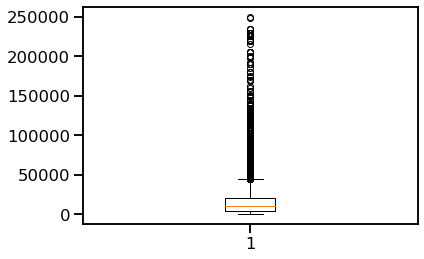

In [232]:
# boxplot price in dataset
plt.boxplot(df.price)
plt.show()

In [259]:
# price quartiles
np.percentile(df.price, [25, 50,75, 100])

array([  4950.,  10500.,  20995., 249988.])

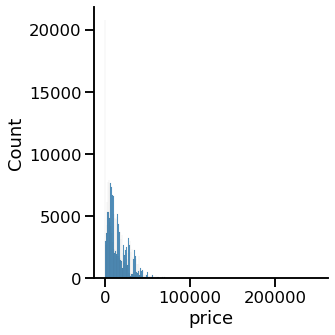

In [233]:
# Distribution plot of price
sns.displot(df.price)

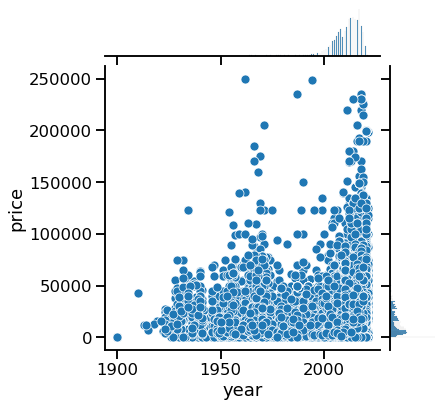

In [234]:
# joint plot  Year Vs Price
sns.jointplot( x = 'year', y = 'price' , data = df)

# Insght to Business Question

### Question - Which are the high value markets?


Location - top 5 states by sales volume are - ca, fl, tx, or, ny
 
Manufacture - ford, Chevrolet, Toyota, Honda are the top manufactures

Models - the best selling models are F150 , silverado 1500, 1500, camry, accord
 
fuel - gas vehicles sell more than desiel common with 6 cylinders out selling 4 & 8 cylinders.

Vehicles priced $10,500 - $20995 constitute 25 - 75 percentile of market.  





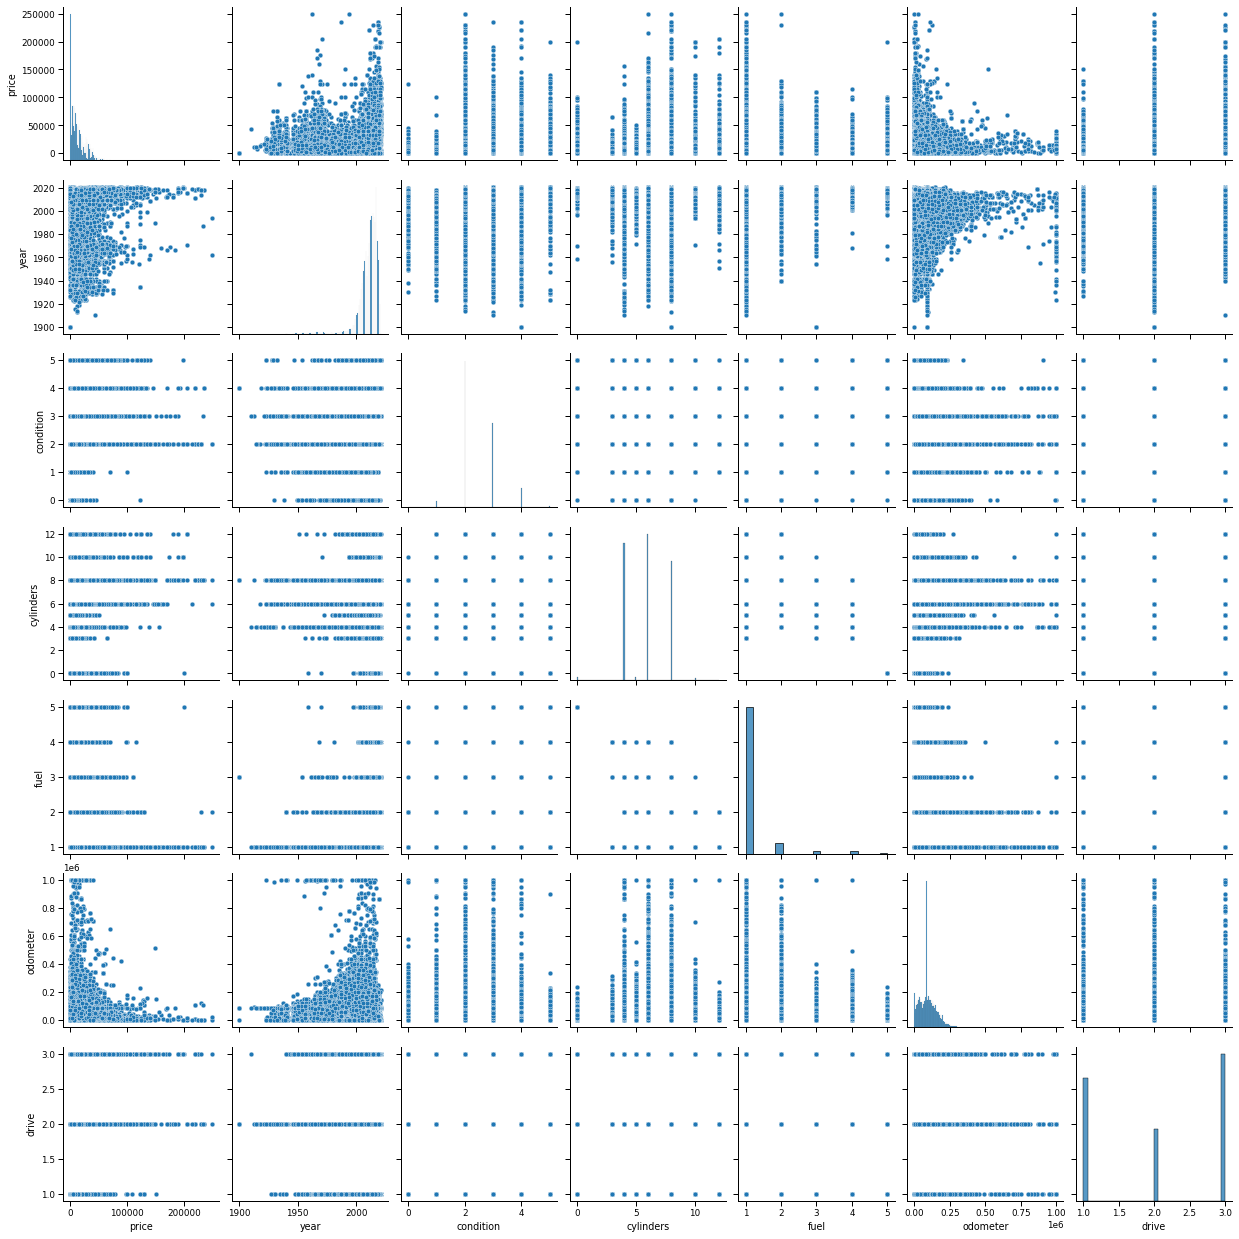

In [260]:
# pairplot

sns.pairplot(df)

<AxesSubplot:xlabel='state', ylabel='price'>

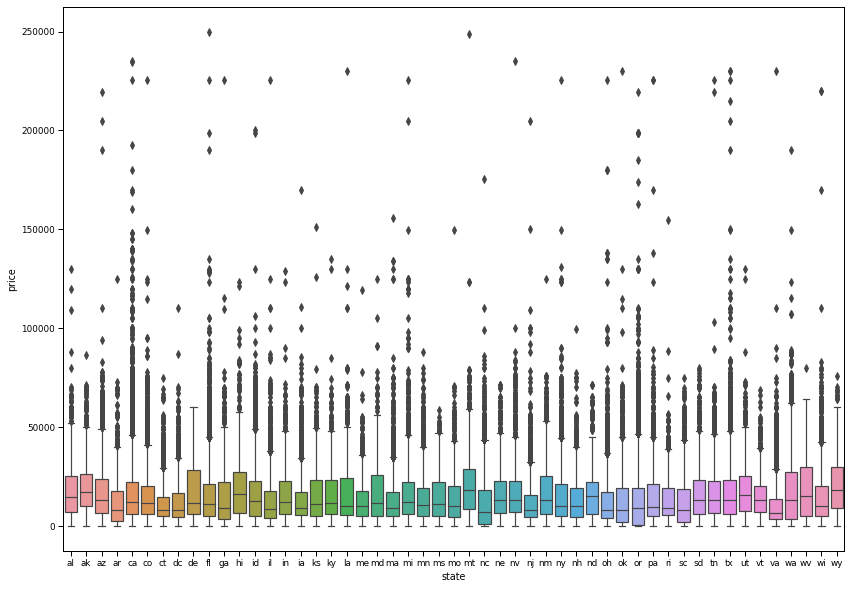

In [261]:

plt.figure(figsize = (14, 10))
sns.boxplot( x = 'state', y = 'price', data = df)
